In [8]:
from pathlib import Path
PROJECT_ROOT = Path.cwd().parents[1]
import sys
sys.path.append(str(PROJECT_ROOT))
from bahamas_lig.utils import *
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
from scipy.ndimage import zoom
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from scipy.io import loadmat
import copy

In [9]:
## Styling
sns.set_palette("viridis", n_colors=6)
sns.set_style(
    "ticks",
    {
        "axes.edgecolor": ".3",
        "xtick.color": ".3",
        "ytick.color": ".3",
        "text.color": ".3",
        "axes.facecolor": "(.98,.98,.98)",
        "axes.grid": True,
        "grid.color": ".9",
        "grid.linestyle": u"-.",
    },
)
sns.set_context("talk")

## Load ESL curves

In [10]:
_,age,_=load_model('output96Cp55_ICE6G_Bin',rsl_dir='output_wider_context')
ESL_mat = loadmat(data_dir / "processed/ESL.mat")
Wael = ESL_mat["Wael_S"].ravel()
Wael_T = ESL_mat["Wael_T"].ravel()
Age_ESL = ESL_mat["age_com"].ravel()

## Load and process GIA model and land map

In [11]:
im = Image.open(data_dir / "processed/land_mask.tif")
imarray = np.array(im)
imarray_ext = [-180.00000000000003, 180.00000000000003, -85.05112880000001, 83.6664731]
landzoom = zoom(imarray, 2, order=3)

md_no_big = 310
directory = model_dir / "get_GIA/output_wider_context/"

files = np.array(os.listdir(directory))
ids = np.array(["output96Cp55_ICE6G_Bin" in file for file in files])
load_files = np.sort(files[ids])

lats2 = pd.read_csv(str(model_dir)+ "/" +  "get_GIA" + "/" + "lats_wider", delimiter=",", header=None)
lons2 = pd.read_csv(str(model_dir)+ "/" +  "get_GIA" + "/" + "lons_wider", delimiter=",", header=None)

extent = [0, 1, 0, 1]
model_dimsL = [
    np.min(lons2.values),
    np.max(lons2.values),
    np.min(lats2.values),
    np.max(lats2.values),
]

DF = []
for F in load_files:
    DF.append(pd.read_csv(str(directory) + "/" + F).values)

In [12]:
zoomlevel = 4
i = 13  # age slice
early_LIG = zoom(DF[i], zoomlevel, order=3)
i = 3  # age slice
late_LIG = zoom(DF[i], zoomlevel, order=3)

In [13]:
inagua_RSL = [lookup_z(21, -73.6, df, model_dimsL) for df in DF]
nassau_RSL = [lookup_z(25, -77.4, df, model_dimsL) for df in DF]
abaco_RSL = [lookup_z(26.979666, -77.655673, df, model_dimsL) for df in DF]

## Figure 1

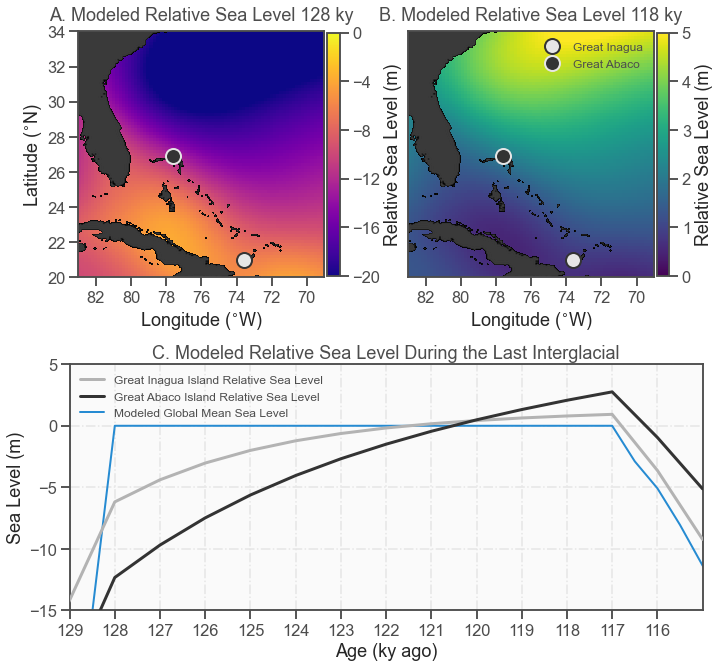

In [14]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 9))

plt.subplot(gs[0, 0])
shrink = 0.99


plt.imshow(
    early_LIG,
    interpolation="nearest",
    cmap="plasma",
    vmin=-20,
    vmax=0,
    extent=model_dimsL,
)
plt.colorbar(
    shrink=shrink,
    pad=0.01,
    label="Relative Sea Level (m)",
    ticks=np.linspace(-20, 0, 6).astype(int),
)
my_grey = copy.copy(cm.get_cmap("Greys_r"))
my_grey.set_under("k", alpha=0)
plt.imshow(
    landzoom,
    interpolation="gaussian",
    cmap=my_grey,
    vmin=0.1,
    vmax=5,
    extent=imarray_ext,
)
plt.plot(
    -73.6,
    21,
    "o",
    markersize=15,
    markeredgewidth=2,
    markeredgecolor=(0.2, 0.2, 0.2),
    markerfacecolor=(0.9, 0.9, 0.9),
)
plt.plot(
    -77.6,
    26.9,
    "o",
    markersize=15,
    markeredgewidth=2,
    markeredgecolor=(0.9, 0.9, 0.9),
    markerfacecolor=(0.2, 0.2, 0.2),
)
# plt.text(-81,23,'New Providence',color=(.1,.1,.1))
# plt.text(-79.25,22.2,'Island',color=(.1,.1,.1))


# plt.text(-73.5,21+.7,'Great Inagua',color=(.1,.1,.1))
# plt.text(-72.5,20.2+.7,'Island',color=(.1,.1,.1))


plt.gca().set_title("A. Modeled Relative Sea Level 128 ky",y=1.02)
plt.gca().grid(False)
# plt.gca().set_yticks([])
plt.gca().set_ylim([20, 34])
plt.gca().set_xlim([-83, -69])
plt.gca().set_ylabel("Latitude ($^{\circ}$N)")
plt.gca().set_xticks(np.linspace(-82, -70, 7).astype(int))
plt.gca().set_xticklabels(-1 * np.linspace(-82, -70, 7).astype(int))
plt.gca().set_xlabel("Longitude ($^{\circ}$W)")

plt.subplot(gs[0, 1])

plt.imshow(
    late_LIG,
    interpolation="nearest",
    cmap="viridis",
    vmin=0,
    vmax=5,
    extent=model_dimsL,
)
plt.colorbar(
    shrink=shrink,
    pad=0.01,
    label="Relative Sea Level (m)",
    ticks=np.linspace(0, 5, 6).astype(int),
)


# plt.imshow(late_LIG,interpolation='nearest',
#            cmap='viridis',vmin=0,vmax=5,extent=model_dimsL)
# plt.colorbar(shrink=shrink,pad=.1,label='Relative Sea Level (m)')

my_grey.set_under("k", alpha=0)
plt.imshow(
    landzoom,
    interpolation="gaussian",
    cmap=my_grey,
    vmin=0.1,
    vmax=5,
    extent=imarray_ext,
)
plt.plot(
    -73.6,
    21,
    "o",
    markersize=15,
    markeredgewidth=2,
    markeredgecolor=(0.2, 0.2, 0.2),
    markerfacecolor=(0.9, 0.9, 0.9),
    label="Great Inagua",
)
plt.plot(
    -77.6,
    26.9,
    "o",
    markersize=15,
    markeredgewidth=2,
    markeredgecolor=(0.9, 0.9, 0.9),
    markerfacecolor=(0.2, 0.2, 0.2),
    label="Great Abaco",
)
# plt.plot(LONS_hol,LATS_hol,'.',markersize=15,color='w',label='Holocene RSL data')
plt.legend(loc="best", frameon=False, prop={"size": 12})


plt.gca().set_title("B. Modeled Relative Sea Level 118 ky",y=1.02)
plt.gca().grid(False)
plt.gca().set_yticks([])
plt.gca().set_ylim([20, 34])
plt.gca().set_xlim([-83, -69])
plt.gca().set_xticks(np.linspace(-82, -70, 7).astype(int))
plt.gca().set_xticklabels(-1 * np.linspace(-82, -70, 7).astype(int))
plt.gca().set_xlabel("Longitude ($^{\circ}$W)")


plt.plot(0, 1, ".")

plt.subplot(gs[1, :])

plt.plot(
    -1 * np.array(age),
    inagua_RSL,
    lw=3,
    color=(0.7, 0.7, 0.7),
    label="Great Inagua Island Relative Sea Level",
    zorder=5,
)
plt.plot(
    -1 * np.array(age),
    abaco_RSL,
    color=(0.2, 0.2, 0.2),
    lw=3,
    label="Great Abaco Island Relative Sea Level",
    zorder=5,
)
plt.plot(
    -1 * Age_ESL, Wael, "-", lw=2, label="Modeled Global Mean Sea Level", c="#268bd2"
)
plt.legend(loc="upper left", frameon=False, prop={"size": 12})

plt.gca().set_ylim([-15, 5])
plt.gca().set_xlim([-129, -115])

plt.gca().set_xticks(np.arange(-129, -115))
plt.gca().set_xticklabels(-1 * np.arange(-129, -115))

plt.gca().set_title("C. Modeled Relative Sea Level During the Last Interglacial")
plt.gca().set_xlabel("Age (ky ago)")
plt.gca().set_ylabel("Sea Level (m)")

fig.tight_layout(pad=0, w_pad=-1, h_pad=1)
# fig.savefig(str(FIG_PATH) + "/Figure_2.pdf", bbox_inches="tight", dpi=300)
fig.savefig("Figure_1.pdf", bbox_inches="tight", dpi=300)

**Fig. 1.**  A. Modeled sea level at the start of the last interglacial relative to todayassuming no change in global mean sea level during the LIG. This number is equal tothe elevation relative to sea level today that one would find a sediment that recordssea level from the start of the last interglacial if LIG global mean sea level did notexceed present values. B. Modeled sea level at the end of the last interglacial relativeto today assuming no change in global mean sea level during the LIG. C. Change inmodeled local sea level relative for Great Inagua and New Providence Island. TheGIA model used here has a lower mantle viscosity of 5×10$^{21}$Pa·s, upper mantleviscosity of 0.5×10$^{21}$Pa·s, and a lithosphere thickness of 96 km; the MIS6 ice sheetsize and geometry is equal to the last glacial maximum. See Methods for more details.